In [3]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from urllib.parse import quote
from tqdm import tqdm
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

In [12]:
# url 가져오기 
url = 'https://sports.news.naver.com/kbaseball/news/index?isphoto=N'
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver.exe')
driver.get(url)
# soup = BeautifulSoup(driver.page_source, 'html.parser')

In [ ]:
#_newsList > ul > li:nth-child(1) > div > a > span
#_newsList > ul > li:nth-child(1) > div > a
#_newsList > ul > li:nth-child(1)

In [ ]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [24]:
lis = driver.find_element(By.XPATH, '//*[@id="_newsList"]/ul/li[1]/div/a/span')
lis

<selenium.webdriver.remote.webelement.WebElement (session="1d6acade5128940336246e2dfbe04cb8", element="a5676cc8-5e24-4bb3-9eed-c5e9f6dd3174")>

In [22]:
lis = soup.select('#_newsList > ul > li ')
lis

[<li>
 <a class="thmb" href="/kbaseball/news/read?oid=425&amp;aid=0000139723" onclick="clickcr(this, 'nwl.image', '', '', event);">
 <img alt="2022항저우아시안게임 야구 국가대표 예비명단 198명 확정…프로 180명+아마추어 18명" class="lazyLoadImage" lazy-src="https://imgnews.pstatic.net/image/origin/425/2023/04/28/139723.jpg?type=w140" src="https://imgnews.pstatic.net/image/origin/425/2023/04/28/139723.jpg?type=w140" width="140"/>
 <span class="mask"></span>
 </a>
 <div class="text">
 <a class="title" href="/kbaseball/news/read?oid=425&amp;aid=0000139723" onclick="clickcr(this, 'nwl.title', '', '', event);"><span>2022항저우아시안게임 야구 국가대표 예비명단 198명 확정…프로 180명+아마추어 18명</span></a>
 <p class="desc">오는 9월 중국 항저우아시안게임에 나갈 야구 대표팀 예비 명단이 확정됐다.KBO(총재 허구연)와 대한야구소프트볼협회(회장 이종훈)는 28일 2022 항저우 ...</p>
 <div class="source">
 <span class="press">마니아타임즈</span>
 <span class="time"><span class="bar"></span>2023.04.28 16:26</span>
 </div>
 </div>
 </li>,
 <li>
 <a class="thmb" href="/kbaseball/news/read?oid=410&amp;aid=0000934806" onclick="c

In [23]:
li = lis[0]
li

<li>
<a class="thmb" href="/kbaseball/news/read?oid=425&amp;aid=0000139723" onclick="clickcr(this, 'nwl.image', '', '', event);">
<img alt="2022항저우아시안게임 야구 국가대표 예비명단 198명 확정…프로 180명+아마추어 18명" class="lazyLoadImage" lazy-src="https://imgnews.pstatic.net/image/origin/425/2023/04/28/139723.jpg?type=w140" src="https://imgnews.pstatic.net/image/origin/425/2023/04/28/139723.jpg?type=w140" width="140"/>
<span class="mask"></span>
</a>
<div class="text">
<a class="title" href="/kbaseball/news/read?oid=425&amp;aid=0000139723" onclick="clickcr(this, 'nwl.title', '', '', event);"><span>2022항저우아시안게임 야구 국가대표 예비명단 198명 확정…프로 180명+아마추어 18명</span></a>
<p class="desc">오는 9월 중국 항저우아시안게임에 나갈 야구 대표팀 예비 명단이 확정됐다.KBO(총재 허구연)와 대한야구소프트볼협회(회장 이종훈)는 28일 2022 항저우 ...</p>
<div class="source">
<span class="press">마니아타임즈</span>
<span class="time"><span class="bar"></span>2023.04.28 16:26</span>
</div>
</div>
</li>

In [8]:
titles = soup.select('_newsList > ul > li:nth-child(1) > div > a')
titles

[]

In [ ]:
title = titles[0]
title

In [ ]:
title.get_text().strip()

In [6]:
lines = []
titles = soup.select('div.text_area > strong')
title = titles[0]
for title in titles:
    lines.append(title.get_text().strip())

In [12]:
# a_list = []
# titles = soup.select('div.text_area > strong')
# title = titles[0]
# for title in titles:
#     # ps = title.select('div.text_area > strong')
#     paragraph = ''
#     for p in titles:
#         text = p.get_text()
#         paragraph += text + '\n'
#     a_list.append(paragraph)

In [21]:
# aa_list = []
# titles = soup.select('div.text_area > strong')
# title = titles[0]
# paragraph = ''
# for title in titles:
#     text = title.get_text().strip()
#     paragraph += text + '\n'
# aa_list.append(paragraph)

In [29]:
with open('data/스포츠뉴스.txt', 'w', encoding='utf-8') as f:
    for line in lines:
        f.write(line + '\n')

In [28]:
len(lines), lines

(46,
 ['논란 배제+신예 중심+아마 포함, AG 대표팀 확 바뀐다',
  '이강인 EPL 아닌 \'라리가 잔류\' 가능성 "ATM 시메오네 감독 영입 승인, 매우 단호"',
  "'타자 오타니'가 '투수 오타니'를 구했다",
  "타선아 힘내라, 우리가 버틸게… KIA 마운드 분전 '리그 1위' LG 상대로도 통할까",
  '"맨시티서 행복하지 않다" 올여름 \'이적 추진\', 연봉 삭감도 흔쾌히',
  "김하성 2경기 연속 멀티 출루 '부진 탈출'…팀은 컵스에 패",
  '울산현대, 인천 원정에서 "잘 있어요~~~"',
  '[공태현 레슨] ＜웨지＞ 팔을 접었다 펴는 느낌 활용하기',
  "'굴욕적인 경기' 맨시티에게 처참하게 패배한 아스날, 전술천재 과르디올라",
  '[이시우 레슨] ＜드라이버＞다운스윙 시 하체 회전하고 상체는 허리 지점에서 멈추기',
  "이강인 아틀레티코전 4인 돌파 드리블 '아르헨 월드컵 풀백 농락' (스페인 현지 극찬)",
  '피츠버그 8연승 저지한 다저스...배지환 2안타 2도루',
  "[Winterview] '기사단의 퍼펙트한 연승 질주' SK, 최부경-허일영 인터뷰",
  '"정식 감독 준비됐다" 메이슨 대행 손흥민 선발 제외?! (맨유전 기자회견 풀버전 해설)',
  '네? 죽은 엉덩이도 살려낸다구요?? ‘달인의 힙업운동 비법 공개’ [엉덩이의 달인]',
  'K리그 감독들 과거 사진 대방출 (f.앙드레 익수)',
  '누워서 하는 복근 운동(층간소음 X) 단 15분 선명한 복근 완성하기',
  '[두잇골프] 하체턴 너무어렵죠? 이 기초 동작을 익히지 않으면 계속 어렵습니다.',
  "'4무 4패' 강원FC가 시즌 첫 승을 거둘 수 있었던 이유",
  '[4K 직캠] 조코비치 잡았던 정현..31개월 만에 단식 기강 잡으러 옴ㅣ2023 서울오픈챌린저',
  '턱걸이 제발 ‘이렇게’ 하세요! 팔로 당기지말고 등으로 당기세요!',
  '이게 돼야 진심 100타에서 벗어나요!',
  "'홈에서 1루까지 4.08초' 배지환 

In [46]:
import re, nltk
from konlpy.tag import Okt 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [47]:
with open('data/스포츠뉴스.txt') as f:
    text = f.read()

In [48]:
okt = Okt()
tokens = okt.nouns(text) # 문장에서 명사 추출 (그런데 꼭 그렇게 추출되지만은 않다.)
tokens[:10]

['논란', '배제', '신예', '중심', '아마', '포함', '대표팀', '확', '이강인', '라리가']

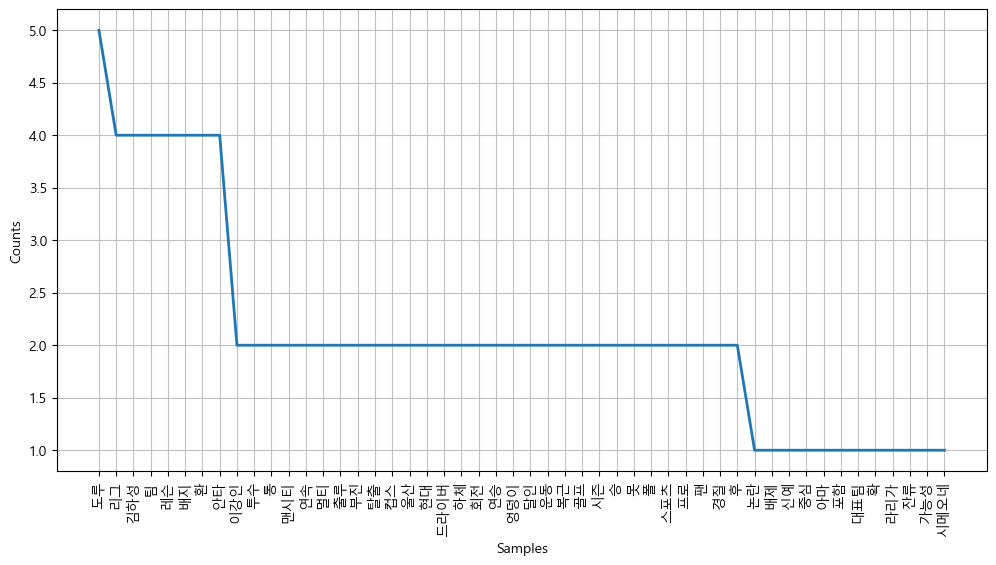

In [70]:
stoptext = """ 
    감독 경기 패 위 전 수 이유 현장 입 오타 동 이 한국 왜
"""
stop_words = stoptext.split()
new_tokens = [word for word in sports if word not in stop_words]
new_tokens[:10]
sports = nltk.Text(new_tokens, name='스포츠뉴스')
plt.figure(figsize=(12,6))
sports.plot(50);

In [71]:
data = sports.vocab().most_common(5)
data

[('도루', 5), ('리그', 4), ('김하성', 4), ('팀', 4), ('레슨', 4)]

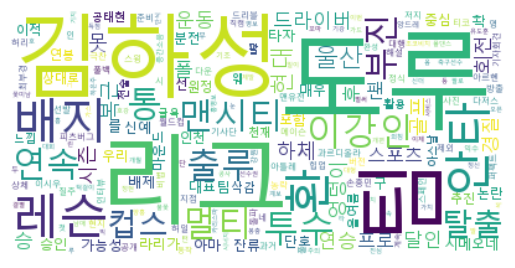

In [73]:
wc = WordCloud(
    background_color='white',
    random_state=2023,
    font_path='c/windows/Fonts/malgun.ttf'
).generate_from_frequencies(dict(sports.vocab().most_common(300)))

# plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

In [59]:
with open('data/여친선물.txt') as f:
    text1 = f.read()

In [60]:
present = okt.nouns(text1)
present[:10]

['혹시', '여친', '생리통', '여친', '선물', '복부', '열기', '저', '생리통', '이번']

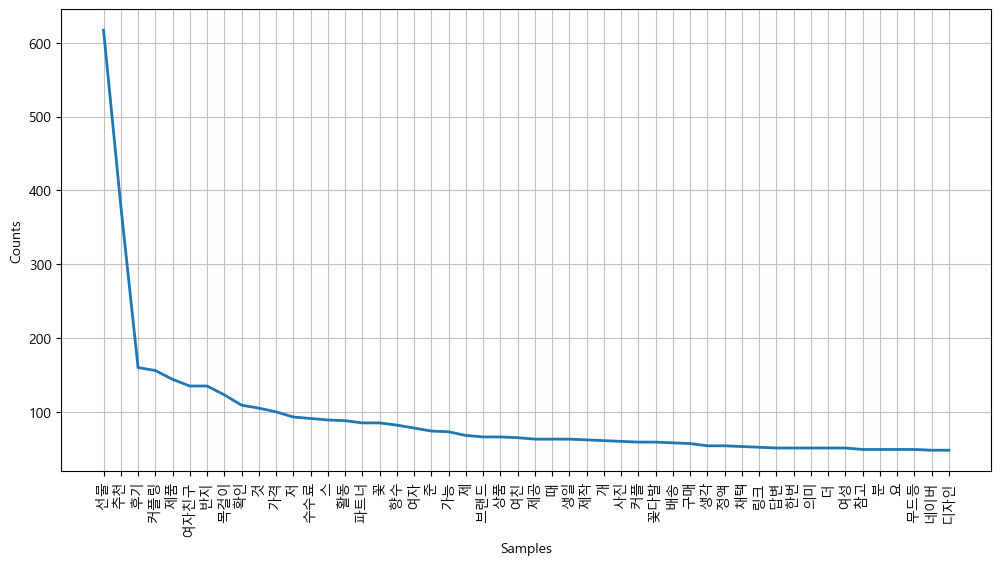

In [74]:
stoptext = """ 
    감독 경기 패 위 전 수 이유 현장 입 오타 동 이 한국 왜
"""
stop_words = stoptext.split()
new_tokens = [word for word in present if word not in stop_words]
new_tokens[:10]
present = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(12,6))
present.plot(50);

In [1]:
wc = WordCloud(
    background_color='white',
    random_state=2023,
    font_path='c/windows/Fonts/malgun.ttf'
).generate_from_frequencies(dict(present.vocab().most_common(300)))

# plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

NameError: name 'WordCloud' is not defined